## **import libaries**

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **import dataset**

In [54]:
data = pd.read_excel('HousePricePrediction.xlsx')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


## **Data Preprocess**

### (1.1) the shape of data

In [58]:
data.shape

(2919, 13)

(1.2) data category

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them

In [62]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables: ", object_cols)
print("Number of categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print('Numerical data (int type): ', num_cols)
print("Number of integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print('Numerical data (float type): ', fl_cols)
print("Number of float variables:",len(fl_cols))

Categorical variables:  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical variables: 4
Numerical data (int type):  []
Number of integer variables: 0
Numerical data (float type):  ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
Number of float variables: 3


So we have categorical data and numerical data.

## **Exploratory Data Analysis (EDA)**

EDA refers to deep data analysis that discovers patterns and spots anomalies. Before making inferences from data it is essential to examine all your variables

### (2.1)  make a heatmap using seaborn library to see the correlation.

<Axes: >

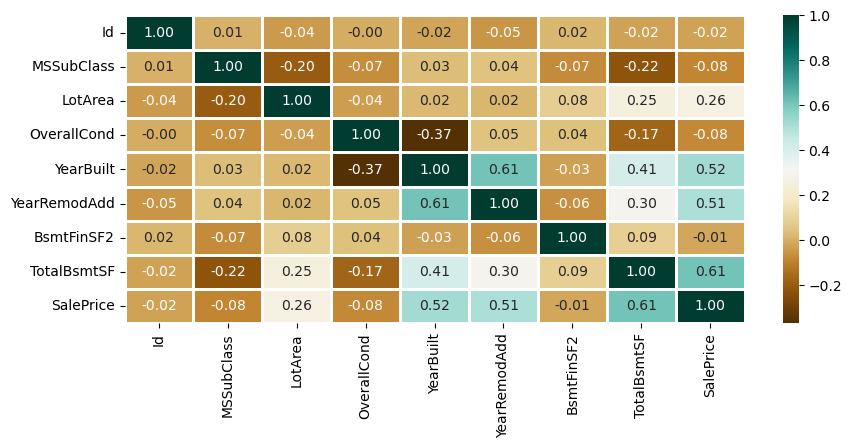

In [68]:
# Select only numerical features for correlation analysis
numerical_dataset = data.select_dtypes(include = ['number'])

plt.figure(figsize = (10, 4))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

(2.2) To analyze the different categorical features. Let’s draw the barplot.

Pandas: In Pandas, the unique() function is used to return the unique values in a Series (column) or DataFrame.
Python


  import pandas as pd

  df = pd.DataFrame({'A': [1, 2, 1, 3]})
  unique_values = df['A'].unique() 
  print(unique_values)  # Output: [1, 2, 3]

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

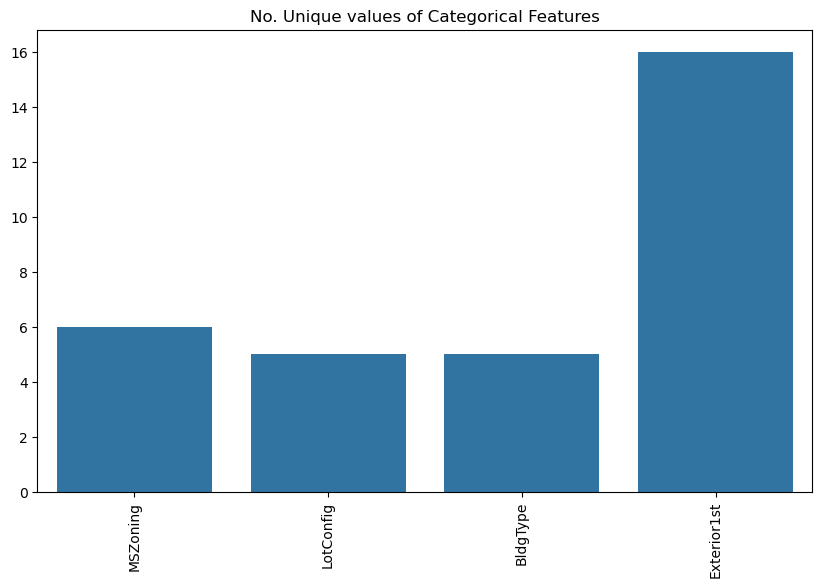

In [72]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

## **Data Cleaning**

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

### (3.1) drop id column

In [77]:
data.drop(['Id'],
             axis=1,
             inplace=True)

In [79]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


### (3.2) Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [82]:
data['SalePrice'] = data['SalePrice'].fillna(
  data['SalePrice'].mean()) 

In [84]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


### (3.3) Drop records with null values (as the empty records are very less).

In [87]:
new_dataset = data.dropna()

In [89]:
new_dataset

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


### (3.4) Checking features which have null values in the new dataframe (if there are still any).

In [92]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### (3.5) Transfer categorical data to numerical data

In [99]:
# create a copy of original dataset
data_numer = new_dataset.copy()

# create an array of all categorical data
numer_label = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
label_array = np.array(numer_label)

In [101]:
# encode categorical data excludes targets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in label_array:
    le.fit(data_numer[column])
    data_numer[column] = le.transform(data_numer[column])

data_numer

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.00000
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.00000
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.00000
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.00000
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,1936,4,3,7,1970,1970,5,0.0,546.0,180921.19589
2915,160,4,1894,4,4,5,1970,1970,5,0.0,546.0,180921.19589
2916,20,3,20000,4,0,7,1960,1996,12,0.0,1224.0,180921.19589
2917,85,3,10441,4,0,5,1992,1992,6,0.0,912.0,180921.19589


In [105]:
print('The number of different types in MSZoning: ')
print(new_dataset.MSZoning.value_counts(normalize=False))
print()

print('The number of different types in MSZoning: ')
print(data_numer.MSZoning.value_counts(normalize=False))
print()

The number of different types in MSZoning: 
MSZoning
RL         2264
RM          459
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

The number of different types in MSZoning: 
MSZoning
3    2264
4     459
1     139
2      26
0      25
Name: count, dtype: int64



In [109]:
print('The number of different types in LotConfig: ')
print(new_dataset.LotConfig.value_counts(normalize=False))
print()

print('The number of different types in LotConfig: ')
print(data_numer.LotConfig.value_counts(normalize=False))
print()

The number of different types in LotConfig: 
LotConfig
Inside     2128
Corner      511
CulDSac     176
FR2          85
FR3          13
Name: count, dtype: int64

The number of different types in LotConfig: 
LotConfig
4    2128
0     511
1     176
2      85
3      13
Name: count, dtype: int64



In [113]:
print('The number of different types in BldgType: ')
print(new_dataset.BldgType.value_counts(normalize=False))
print()

print('The number of different types in BldgType: ')
print(data_numer.BldgType.value_counts(normalize=False))
print()

The number of different types in BldgType: 
BldgType
1Fam      2419
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

The number of different types in BldgType: 
BldgType
0    2419
4     227
2     109
3      96
1      62
Name: count, dtype: int64



In [115]:
print('The number of different types in Exterior1st: ')
print(new_dataset.Exterior1st.value_counts(normalize=False))
print()

print('The number of different types in Exterior1st: ')
print(data_numer.Exterior1st.value_counts(normalize=False))
print()

The number of different types in Exterior1st: 
Exterior1st
VinylSd    1025
MetalSd     449
HdBoard     442
Wd Sdng     409
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
ImStucc       1
CBlock        1
Name: count, dtype: int64

The number of different types in Exterior1st: 
Exterior1st
12    1025
8      449
6      442
13     409
9      221
5      126
3       87
14      56
0       43
11      43
2        6
1        2
10       2
7        1
4        1
Name: count, dtype: int64



## **choose model and train model**

### (5.1) split dataset into train and tset

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = data_numer.drop(['SalePrice'], axis=1)
Y = data_numer['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor

## (5.2) SVM – Support vector Machine

SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane

In [154]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

svm = svm.SVR()
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_valid)

print("Mean Square Error of SVM : ", mean_absolute_percentage_error(Y_valid, Y_pred_svm))

Mean Square Error of SVM :  0.18705129344734908


### (5.3) Random Forest Regression

Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks

In [158]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor(n_estimators=10)
Rf.fit(X_train, Y_train)
Y_pred_Rf = Lig.predict(X_valid)

print("Mean Square Error of Random Forest Regression : ", mean_absolute_percentage_error(Y_valid, Y_pred_Rf))

Mean Square Error of Random Forest Regression :  0.18984123145190418


### (5.4) linear Regression model

In [161]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_valid)

print("Mean Square Error of linear Regression : ", mean_absolute_percentage_error(Y_valid, Y_pred_LR))

Mean Square Error of linear Regression :  0.18466666253038902


## **conclision**

Linear Regression has the lowest MAPE, indicating the best performance among the three models on this validation set.